# Rain and temperature relation and prediction in Bangladesh

In [1]:
# importing libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the df
df = pd.read_csv("/content/drive/MyDrive/data.csv")
print(df.head())


       tem  Month  Year      rain
0  16.9760      1  1901   18.5356
1  19.9026      2  1901   16.2548
2  24.3158      3  1901   70.7981
3  28.1834      4  1901   66.1616
4  27.8892      5  1901  267.2150


In [4]:
# some vars
month_labels = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]

# 1. plot rain vs temp scatter plot

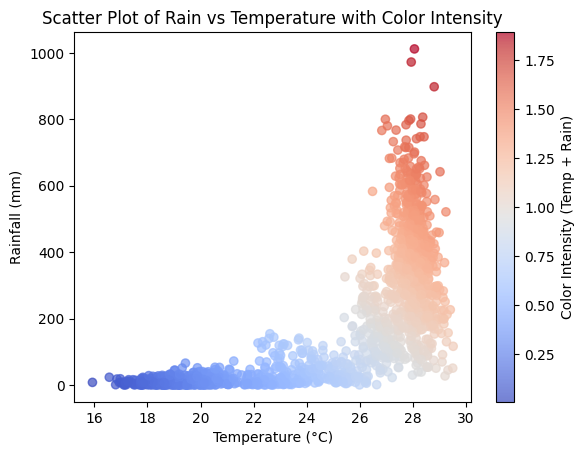

In [5]:
# Normalize the data for better color scaling
df["temp_norm"] = (df["tem"] - df["tem"].min()) / (df["tem"].max() - df["tem"].min())
df["rain_norm"] = (df["rain"] - df["rain"].min()) / (
    df["rain"].max() - df["rain"].min()
)
# Calculate a combined color intensity based on both normalized temperature and rain
df["color_intensity"] = df["temp_norm"] + df["rain_norm"]

scatter = plt.scatter(
    x=df["tem"], y=df["rain"], c=df["color_intensity"], cmap="coolwarm", alpha=0.7
)
plt.colorbar(scatter, label="Color Intensity (Temp + Rain)")

plt.title("Scatter Plot of Rain vs Temperature with Color Intensity")
plt.xlabel("Temperature (°C)")
plt.ylabel("Rainfall (mm)")
plt.show()

# 2. boxplot of rainfall by month

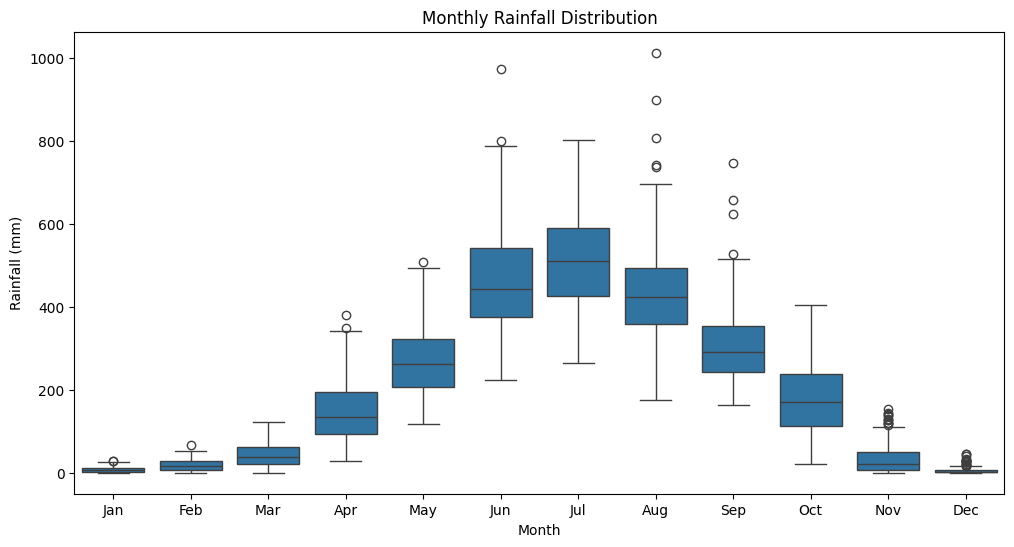

In [6]:

plt.figure(figsize=(12, 6))
sns.boxplot(x="Month", y="rain", data=df)
plt.title("Monthly Rainfall Distribution")
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.xticks(range(0, 12), labels=month_labels)
plt.show()

# 3. plot temperature by month

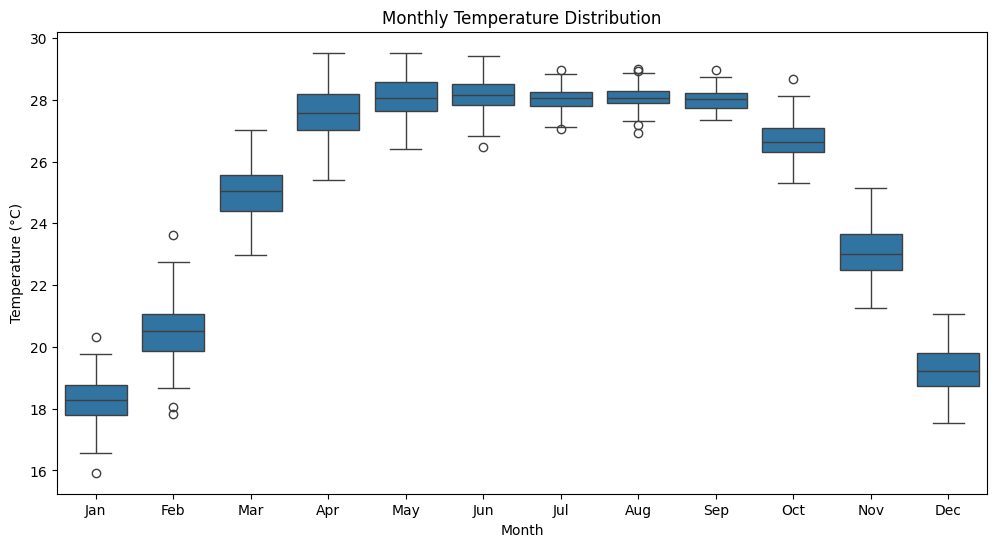

In [7]:

plt.figure(figsize=(12, 6))
sns.boxplot(x="Month", y="tem", data=df)
plt.title("Monthly Temperature Distribution")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.xticks(range(0, 12), labels=month_labels)
plt.show()

# 4. plot yearly trend of temperature and rainfall

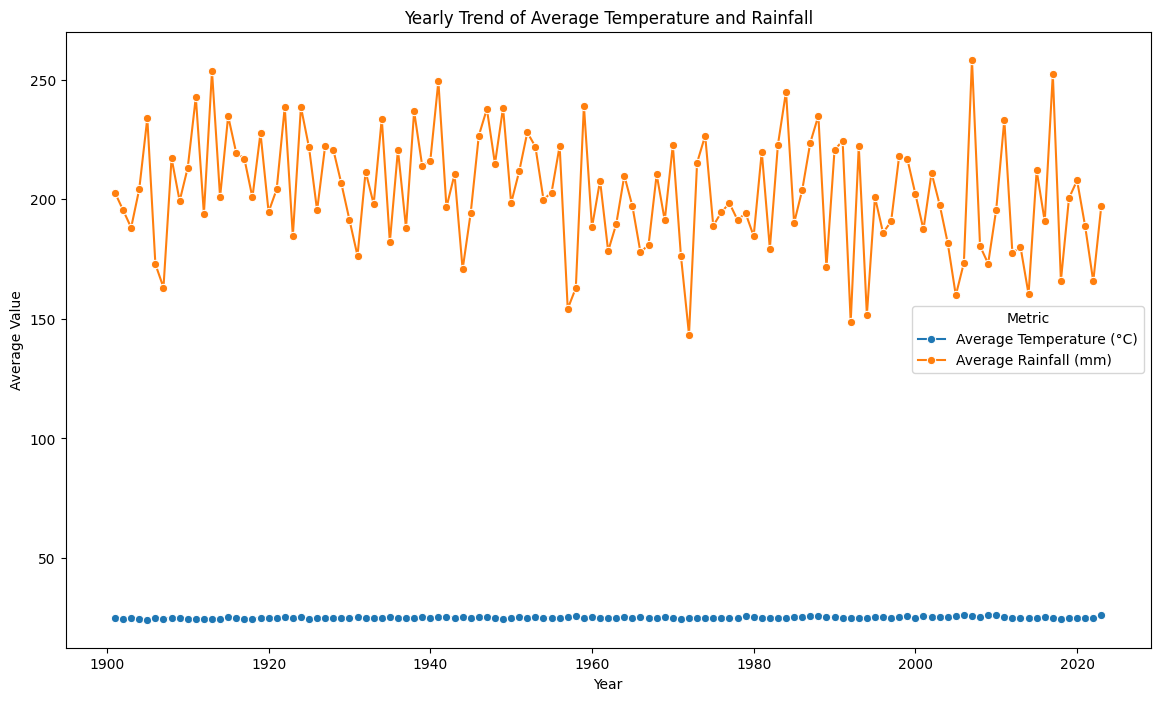

In [8]:
# Calculate the yearly average for temperature and rainfall
yearly_summary = df.groupby("Year").agg({"tem": "mean", "rain": "mean"}).reset_index()

# Rename columns for clarity
yearly_summary = yearly_summary.rename(
    columns={"tem": "Average Temperature (°C)", "rain": "Average Rainfall (mm)"}
)
plt.figure(figsize=(14, 8))
sns.lineplot(
    x="Year",
    y="Average Temperature (°C)",
    data=yearly_summary,
    label="Average Temperature (°C)",
    marker="o",
)
sns.lineplot(
    x="Year",
    y="Average Rainfall (mm)",
    data=yearly_summary,
    label="Average Rainfall (mm)",
    marker="o",
)

plt.title("Yearly Trend of Average Temperature and Rainfall")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.legend(title="Metric")
plt.show()

# 5. avg temp and rainfal by season

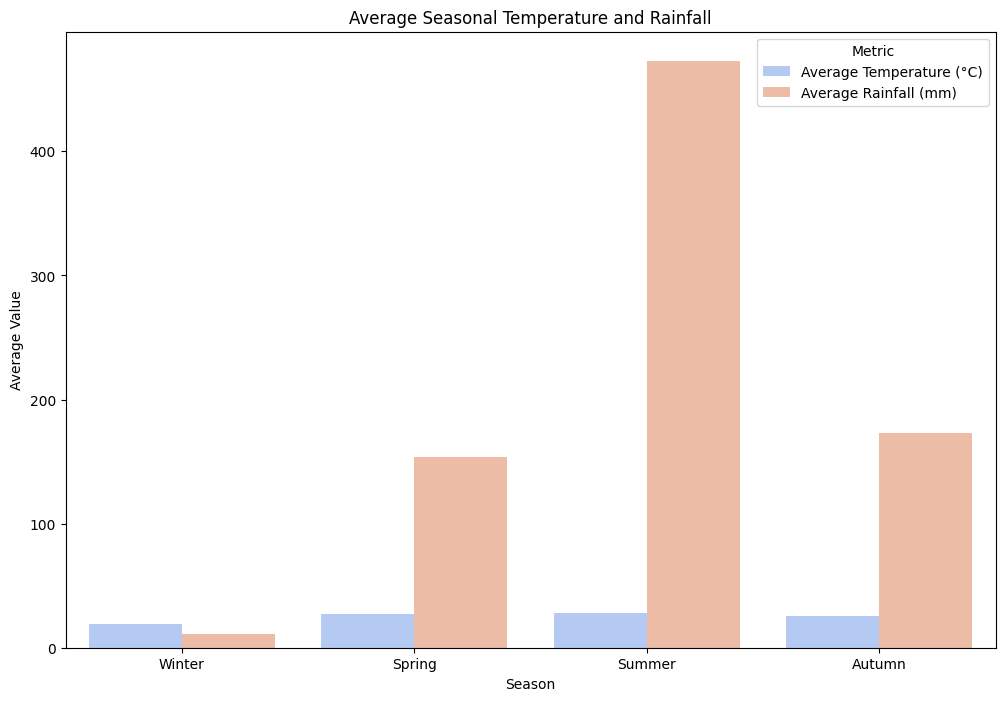

In [10]:
# Define a function to map months to seasons
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Add a 'Season' column to the dataset
df['Season'] = df['Month'].apply(month_to_season)

# Group by 'Season' and calculate the average temperature
seasonal_temperature = df.groupby('Season')['tem'].mean().reset_index()

# Order the seasons correctly
seasonal_temperature['Season'] = pd.Categorical(seasonal_temperature['Season'],
                                                categories=['Winter', 'Spring', 'Summer', 'Autumn'],
                                                ordered=True)
seasonal_temperature = seasonal_temperature.sort_values('Season')

# Calculate the average rainfall for each season
seasonal_rainfall = df.groupby('Season')['rain'].mean().reset_index()

# Combine the average temperature and rainfall into one DataFrame
seasonal_summary = pd.merge(seasonal_temperature, seasonal_rainfall, on='Season')
seasonal_summary = seasonal_summary.rename(columns={'tem': 'Average Temperature (°C)', 'rain': 'Average Rainfall (mm)'})

# Melt the DataFrame for easier plotting
seasonal_summary_melted = seasonal_summary.melt(id_vars='Season',
                                                value_vars=['Average Temperature (°C)', 'Average Rainfall (mm)'],
                                                var_name='Metric', value_name='Value')

# Plot the combined bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Season', y='Value', hue='Metric', data=seasonal_summary_melted, palette='coolwarm')
plt.title('Average Seasonal Temperature and Rainfall')
plt.xlabel('Season')
plt.ylabel('Average Value')
plt.legend(title='Metric')
plt.show()